In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import category_encoders as ce
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Read Data

In [ ]:
df = pd.read_csv('CreditData/train.csv')
# df = pd.read_csv('train.csv')

# Missing or Poorly Formatted Data

In [ ]:
#transform dates to # months

def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

df['Credit_History_Age'] = df['Credit_History_Age'].apply(parse_years_and_months)

In [ ]:
numerical_cols = ['Age', 'Annual_Income',
        'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

categorical_cols = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour','Payment_of_Min_Amount']

int_cols = ['Age', 'Num_of_Loan', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age']

float_cols = [ 'Annual_Income',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Changed_Credit_Limit',
        'Outstanding_Debt',
       'Credit_Utilization_Ratio',
       'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

df = df.drop(columns=['ID', 'SSN', 'Name'])

for col in categorical_cols:
    print(df[col].unique())
    print()

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']

['_' 'Good' 'Standard' 'Bad']

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']

['No' 'NM' 'Yes']



In [ ]:
#remove underscores

def remove_underscore(col):
    df[col] = df[col].apply(lambda x: str(x).replace("_", "") if pd.notna(x) else x)
    df[col] = pd.to_numeric(df[col], errors="coerce")

def replace_single_underscore(val):
    if isinstance(val, str) and len(val) == 1 and val == '_':
        return np.nan
    elif isinstance(val, str) and val == '_______':
        return np.nan
    elif isinstance(val, str) and val == '!@9#%8':
        return np.nan
    return val

for col in numerical_cols:
    remove_underscore(col)

#replace single _ w/ np.nan
df = df.applymap(replace_single_underscore)

In [ ]:
#finding missing data
print(df.isna().sum())
display(df[df.isnull().any(axis=1)]) #display rows w/ nan values
print(len(df))

Customer_ID                     0
Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,NaN,502.38,39.323569,377,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,NaN,502.38,34.663572,378,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,NaN,502.38,40.565631,379,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,Good,502.38,33.638208,381,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


100000


# Negative Values

In [ ]:
# Count rows with neg values for numerical columns only
print((df[numerical_cols] < 0).sum())

#replace neg values w/ nan
df[df[numerical_cols] < 0] = np.nan

Age                          886
Annual_Income                  0
Num_Bank_Accounts             21
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 3876
Delay_from_due_date          591
Num_of_Delayed_Payment       644
Changed_Credit_Limit        1586
Num_Credit_Inquiries           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Total_EMI_per_month            0
Amount_invested_monthly        0
Monthly_Balance                9
dtype: int64


# Outliers and Data Distribution

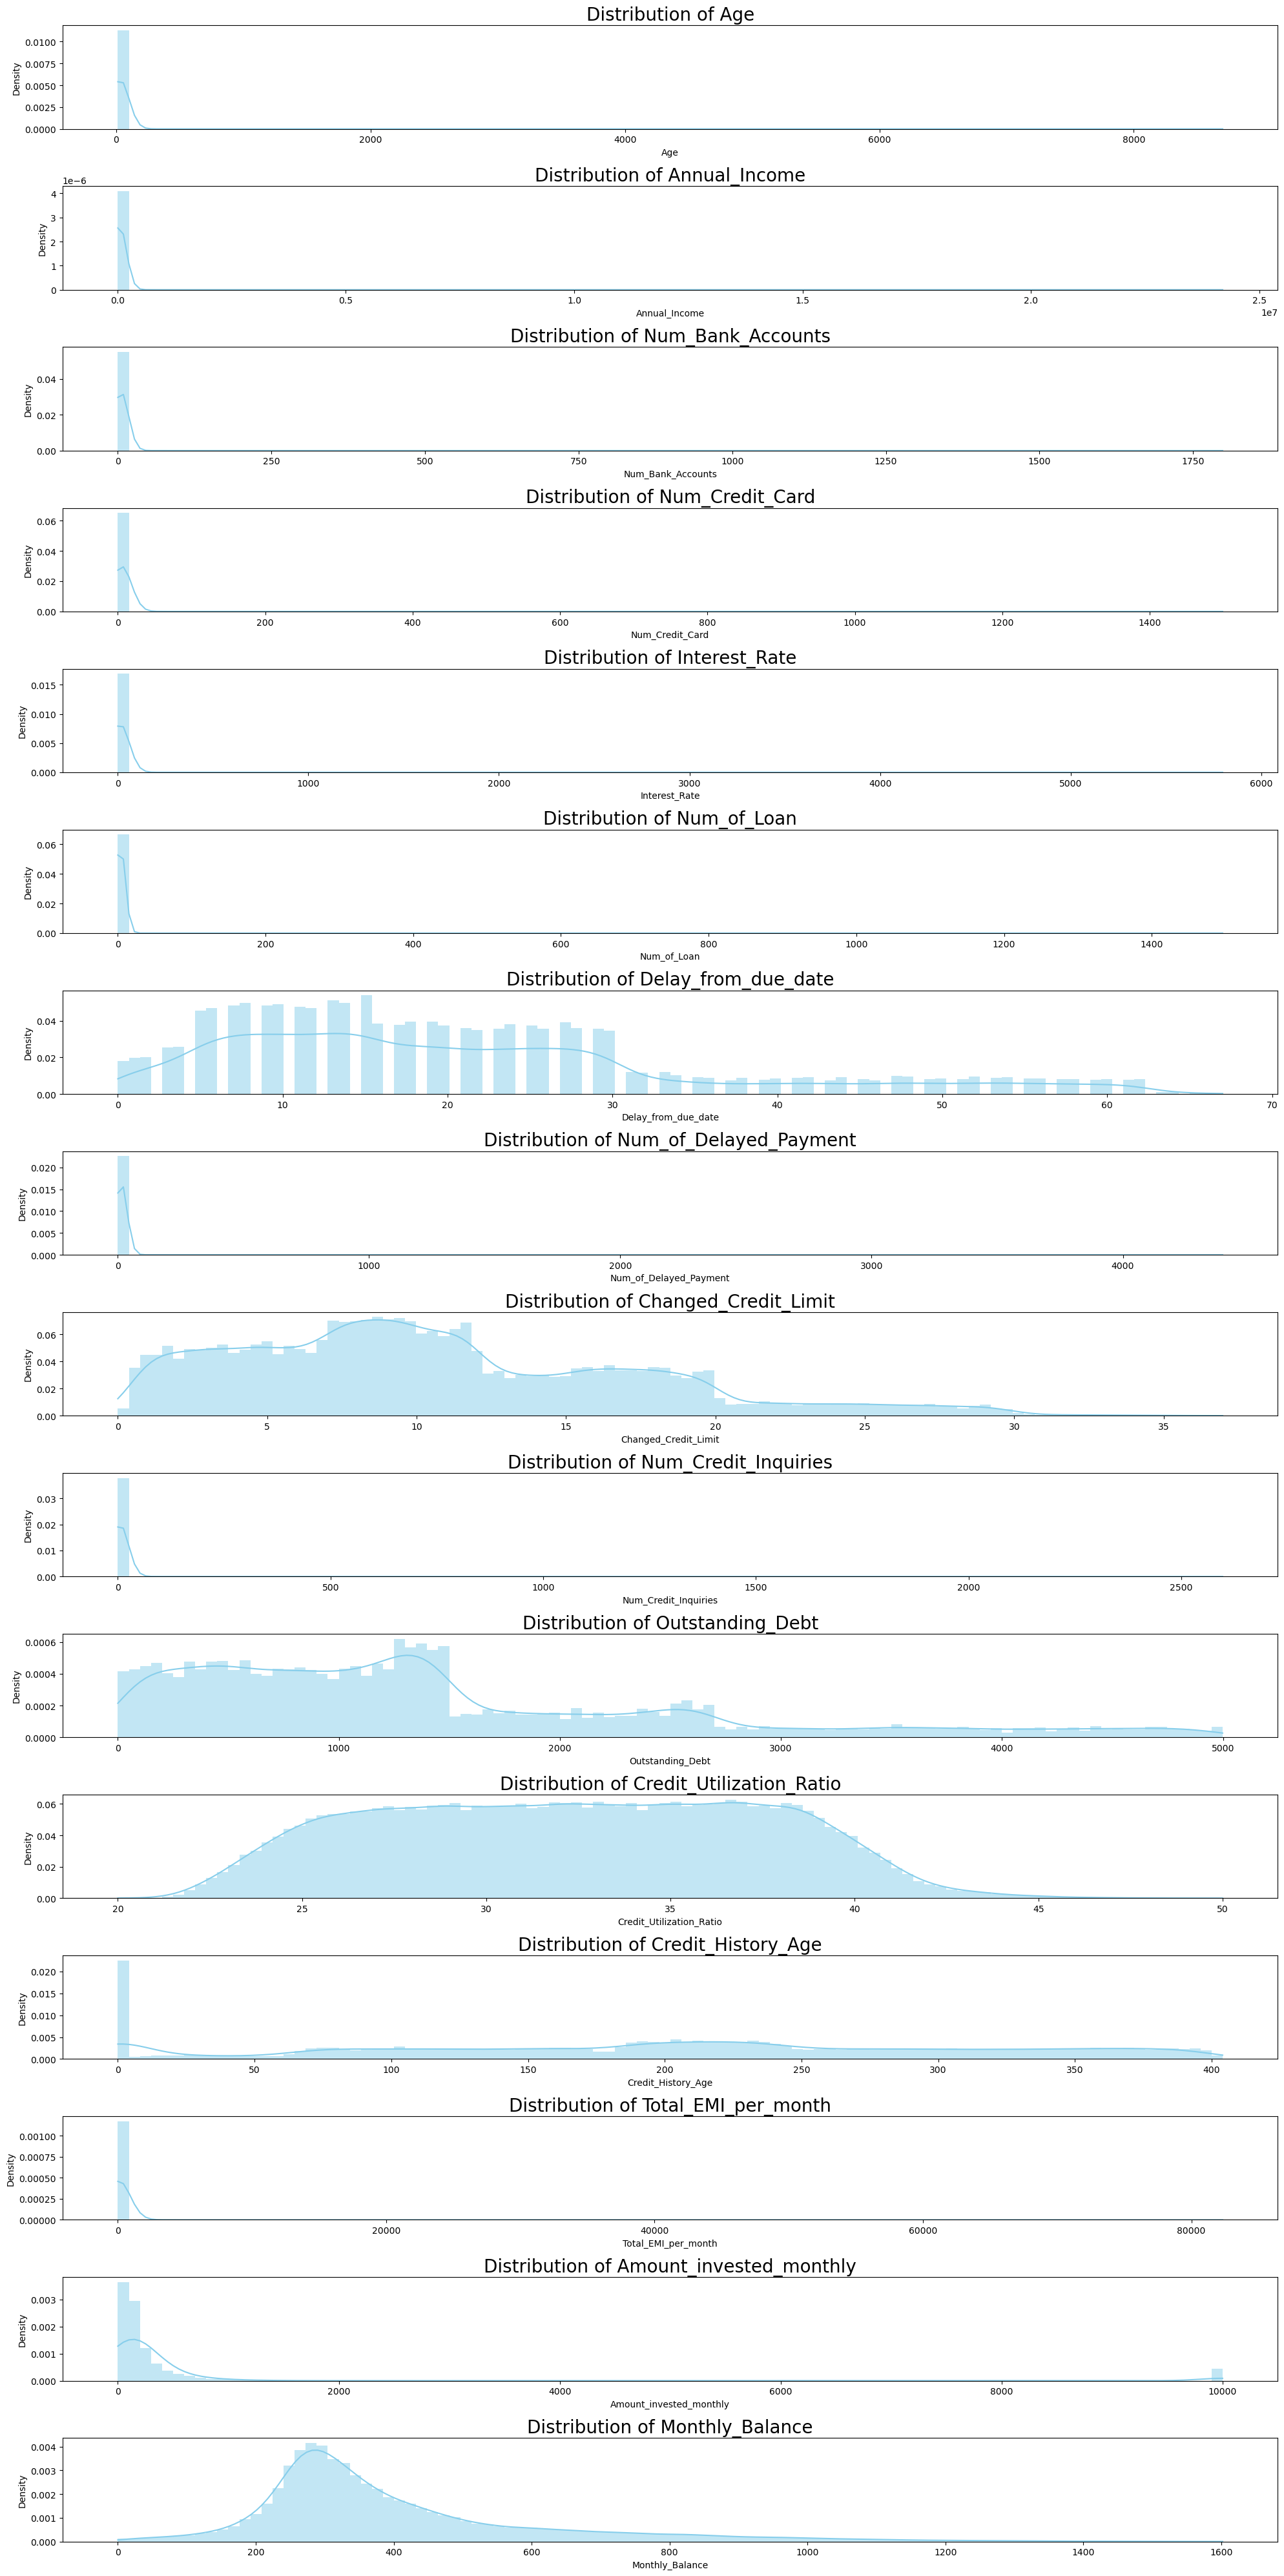

Means and Quartiles of the numerical columns:
-----------------------------------------
Age: 116.10842060657424
Q1:  25.0
Q2:  33.0
Q3:  42.0
Annual_Income: 176415.70129814997
Q1:  19457.5
Q2:  37578.61
Q3:  72790.92
Num_Bank_Accounts: 17.095079966793026
Q1:  3.0
Q2:  6.0
Q3:  7.0
Num_Credit_Card: 22.47443
Q1:  4.0
Q2:  5.0
Q3:  7.0
Interest_Rate: 72.46604
Q1:  8.0
Q2:  13.0
Q3:  20.0
Num_of_Loan: 7.163621988265158
Q1:  2.0
Q2:  3.0
Q3:  5.0
Delay_from_due_date: 21.20724481686769
Q1:  10.0
Q2:  18.0
Q3:  28.0
Num_of_Delayed_Payment: 31.150518656474002
Q1:  9.0
Q2:  14.0
Q3:  18.0
Changed_Credit_Limit: 10.599042492447289
Q1:  5.57
Q2:  9.52
Q3:  15.01
Num_Credit_Inquiries: 27.75425103279441
Q1:  3.0
Q2:  6.0
Q3:  9.0
Outstanding_Debt: 1426.220376
Q1:  566.0725
Q2:  1166.155
Q3:  1945.9625
Credit_Utilization_Ratio: 32.2851725189436
Q1:  28.05256656125577
Q2:  32.30578367171092
Q3:  36.4966630559621
Credit_History_Age: 201.22146
Q1:  114.0
Q2:  208.0
Q3:  292.0
Total_EMI_per_month: 1403.1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is great for statistical visualizations

# Assuming 'numerical_cols' is defined and 'df' is your DataFrame
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(20, 40))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, stat="density", bins=100, ax=axes[i], color="skyblue", linewidth=0)
    axes[i].set_title(f'Distribution of {col}', fontsize=20)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Calculate and print the mean for each numerical column
print("Means and Quartiles of the numerical columns:")
print('-----------------------------------------')
for col in numerical_cols:
    print(f"{col}: {df[col].mean()}")

    first_quartile = df[col].quantile(0.25)
    second_quartile = df[col].quantile(0.5)  # This is actually the median
    third_quartile = df[col].quantile(0.75)
    print("Q1: ", first_quartile)
    print("Q2: ", second_quartile)
    print("Q3: ", third_quartile)

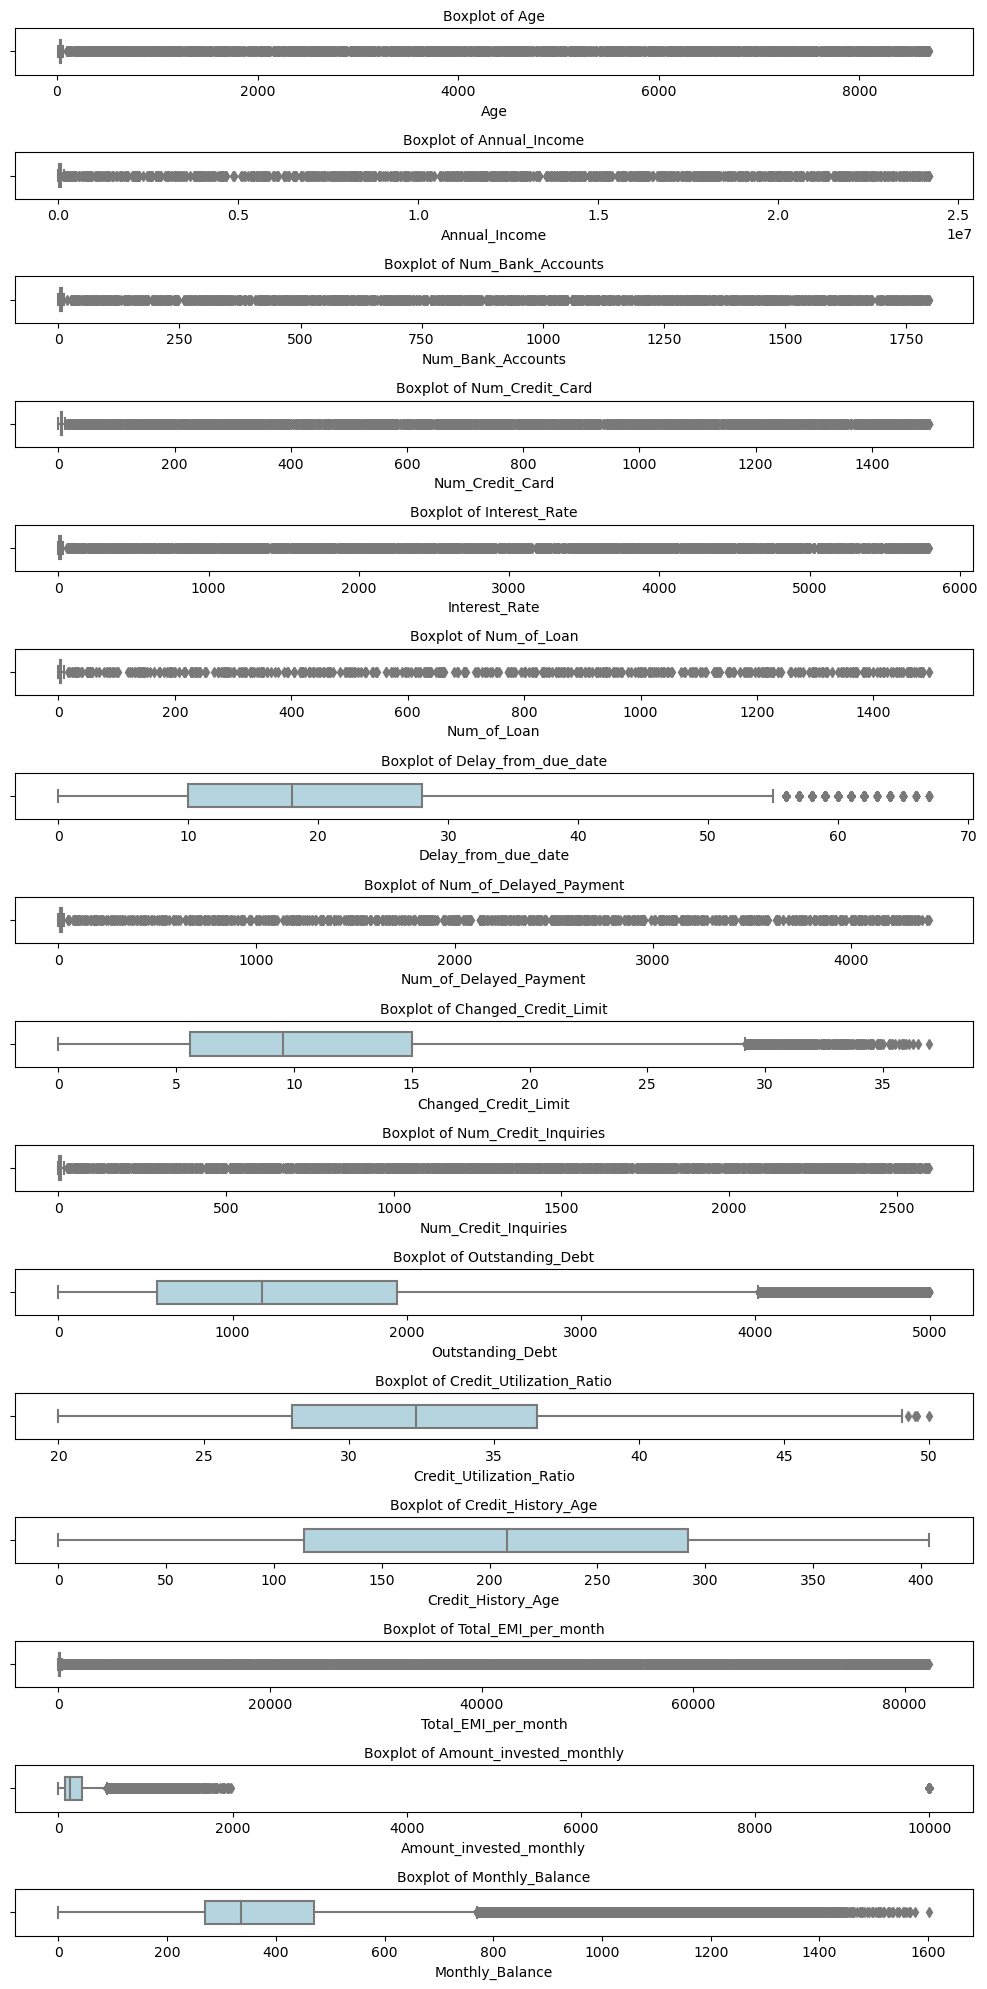

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_cols' is defined and 'df' is your DataFrame
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="lightblue", width=0.5)
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


# Handle Outlier Values

In [ ]:
#drop outlier values

#max values decided based on research of reasonable values for these features as well as analysis of data quartiles
age_max = 110
num_bank_accounts_max = 50
num_credit_card_max = 100
interest_rate_max = 40
num_loans_max = 10
num_delayed_payment_max = 30

#replace w/ nan for imputing later on since too much data would be dropped otherwise
df['Age'] = df['Age'].apply(lambda x: np.nan if x > age_max else x)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x > age_max else x)
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: np.nan if x > age_max else x)

#drop since not many rows are outliers
def drop_max_value_rows(df, cols):
    print("Number of rows dropped due to outliers:")
    for col, max_val in cols:
        initial_rows = df.shape[0]
        df = df[df[col] <= max_val]
        num_dropped_rows = initial_rows - df.shape[0]
        print(col, num_dropped_rows)
    return df

outlier_conditions = [['Num_Bank_Accounts', num_bank_accounts_max], ['Num_Credit_Card', num_credit_card_max], ['Interest_Rate', interest_rate_max]] #['Num_of_Loan', num_loans_max], ['Num_of_Delayed_Payment', num_delayed_payment_max]
df = drop_max_value_rows(df, outlier_conditions)
len(df)

Number of rows dropped due to outliers:
Num_Bank_Accounts 1301
Num_Credit_Card 2106
Interest_Rate 1982


94611

In [ ]:
# Calculate and print the mean for each numerical column
print("Means of the numerical columns:")
print('-----------------------------------------')
for col in numerical_cols:
    print(f"{col}: {df[col].mean()}")

Means of the numerical columns:
-----------------------------------------
Age: 33.32663289267699
Annual_Income: 175771.18021725805
Num_Bank_Accounts: 5.380579425225396
Num_Credit_Card: 5.607318387925294
Interest_Rate: 14.530244897527771
Num_of_Loan: 3.555616922567105
Delay_from_due_date: 21.2011950708643
Num_of_Delayed_Payment: 13.430849284090778
Changed_Credit_Limit: 10.604921096527809
Num_Credit_Inquiries: 27.89434706681327
Outstanding_Debt: 1425.853677162275
Credit_Utilization_Ratio: 32.28679806212997
Credit_History_Age: 201.13879992812676
Total_EMI_per_month: 1398.6555596107644
Amount_invested_monthly: 637.7796370906864
Monthly_Balance: 402.7431707929509


# Impute Data

In [ ]:
# Impute Cols, fill in categorical vars w/ mode, numerical vars w/ mean

def fillna_mode(group):
    mode_values = group.mode()
    if len(mode_values) > 0:  # Check if mode exists
        return group.fillna(mode_values.iloc[0])
    else:
        return group

for col in numerical_cols:
    df[col] = df.groupby('Customer_ID')[col].transform(lambda x: x.fillna(x.mean()))

for col in categorical_cols:
    df[col] = df.groupby('Customer_ID')[col].transform(fillna_mode)

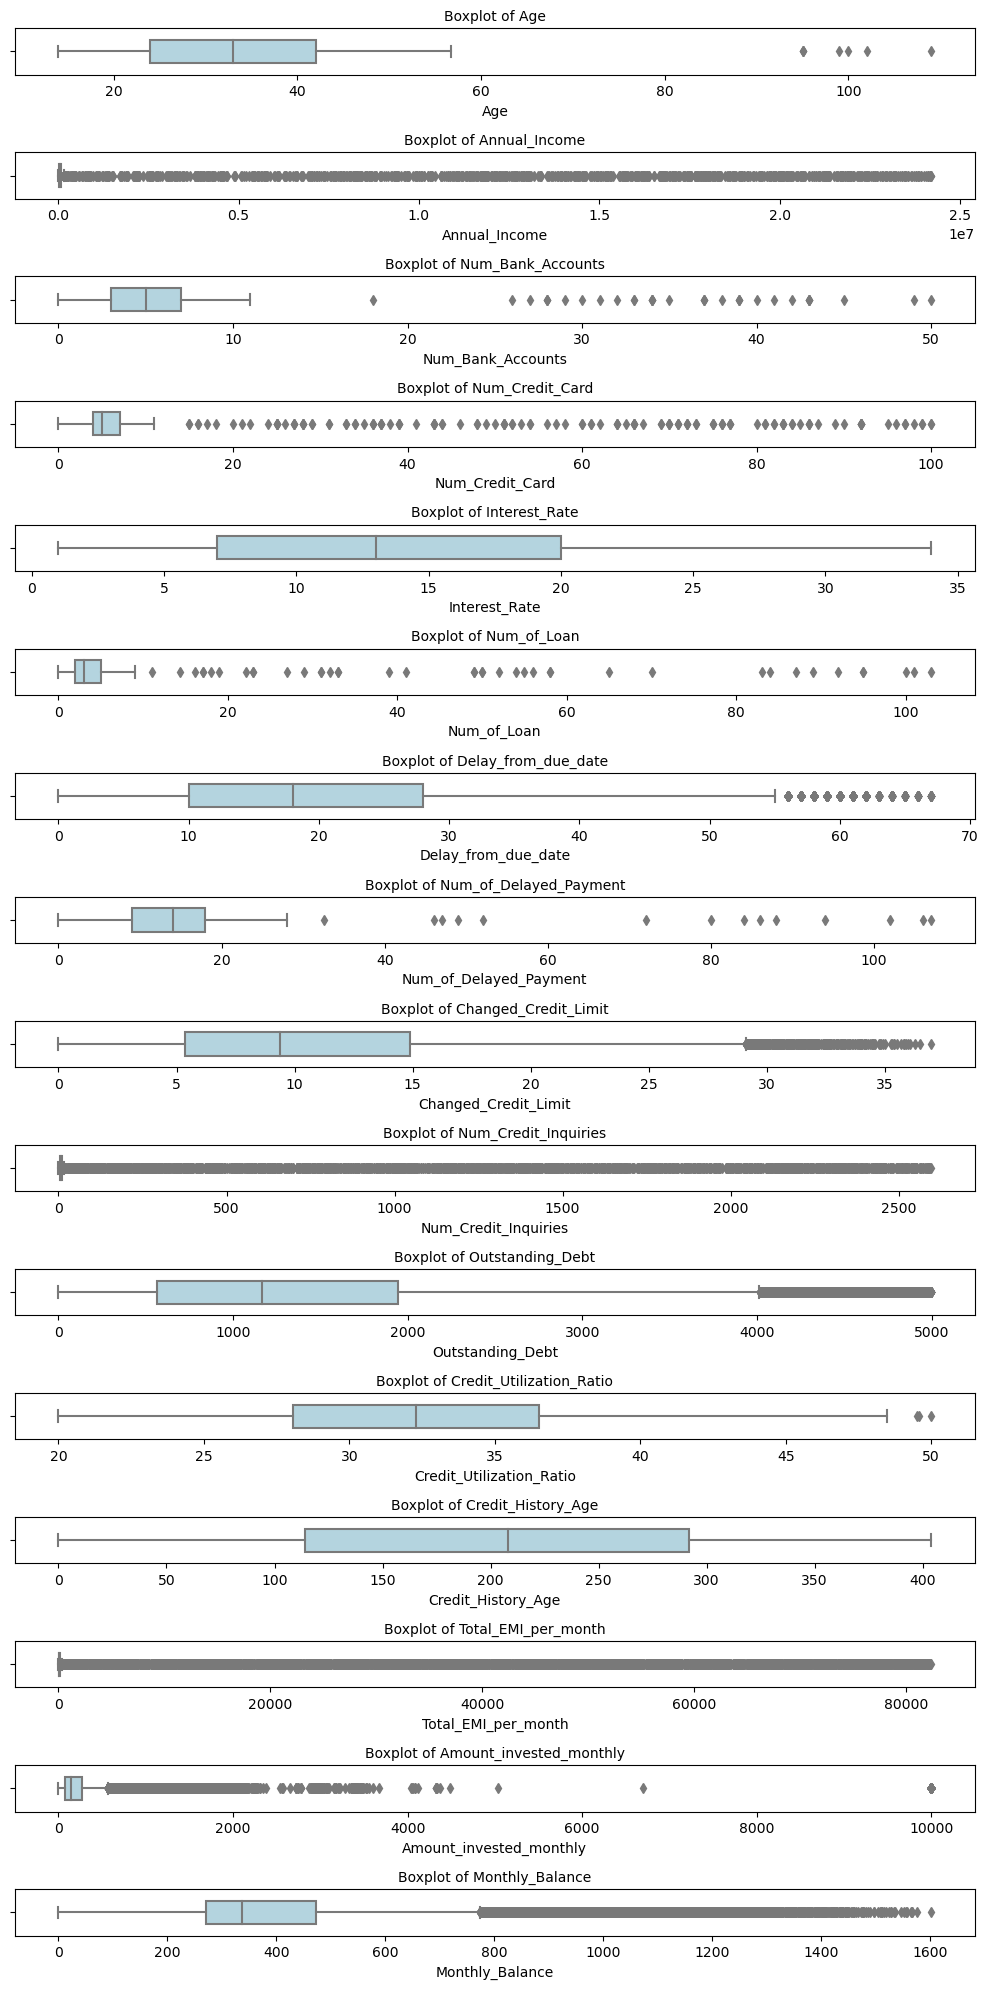

In [ ]:
#visualize distribution again after processing data

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_cols' is defined and 'df' is your DataFrame
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="lightblue", width=0.5)
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
#visualize nan values again after initial data processing
print(df.isna().sum())

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14181
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10778
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      1
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64


In [ ]:
#Monthly_Inhand_Salary is dropped later on due to correlation matrix findings

print("# unique customers w/ missing type of loan for all rows: ", df[df["Type_of_Loan"].isna()]["Customer_ID"].nunique())
print("# rows w/ missing Type_of_Loan: ", len(df[df["Type_of_Loan"].isna()]))
df = df.dropna(subset=['Type_of_Loan'])
len(df)

# unique customers w/ missing type of loan for all rows:  1426
# rows w/ missing Type_of_Loan:  10778


83833

In [ ]:
#convert int_cols to int type
df[int_cols] = df[int_cols].astype(int)

In [ ]:
df.head(3)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,7,11.27,4,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4.428571,6,11.27,4,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,7,10.27,4,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good


# Correlation Matrix->find duplicate numerical attributes

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.006733,-0.185355,-0.108006,-0.214380,-0.179867,-0.170139,-0.185486,-0.154501,-0.005011,-0.198827,0.022179,0.190259,0.001852,0.005049,0.109440
Annual_Income,0.006733,1.000000,-0.008271,0.001618,-0.006656,-0.004023,-0.009449,-0.004511,0.001328,0.003831,-0.003166,0.011007,-0.002148,-0.001839,-0.004564,0.018198
Num_Bank_Accounts,-0.185355,-0.008271,1.000000,0.311300,0.571905,0.418504,0.547937,0.582542,0.316230,0.012246,0.503203,-0.063403,-0.387840,-0.004194,-0.020359,-0.293906
Num_Credit_Card,-0.108006,0.001618,0.311300,1.000000,0.353962,0.264609,0.341323,0.297999,0.175548,0.009651,0.350541,-0.034590,-0.237177,-0.005252,-0.010377,-0.167280
Interest_Rate,-0.214380,-0.006656,0.571905,0.353962,1.000000,0.490423,0.586064,0.566462,0.357107,0.016093,0.630167,-0.068099,-0.465784,-0.002244,-0.019893,-0.323585
Num_of_Loan,-0.179867,-0.004023,0.418504,0.264609,0.490423,1.000000,0.445002,0.424650,0.329319,0.011607,0.575710,-0.075491,-0.429943,0.000166,-0.018099,-0.368001
Delay_from_due_date,-0.170139,-0.009449,0.547937,0.341323,0.586064,0.445002,1.000000,0.537018,0.284340,0.011853,0.570663,-0.057414,-0.394873,-0.002537,-0.014841,-0.275592
Num_of_Delayed_Payment,-0.185486,-0.004511,0.582542,0.297999,0.566462,0.424650,0.537018,1.000000,0.316211,0.015450,0.509709,-0.067764,-0.395567,-0.002883,-0.025852,-0.301142
Changed_Credit_Limit,-0.154501,0.001328,0.316230,0.175548,0.357107,0.329319,0.284340,0.316211,1.000000,0.005921,0.466972,-0.041930,-0.345548,-0.002885,-0.011620,-0.200560
Num_Credit_Inquiries,-0.005011,0.003831,0.012246,0.009651,0.016093,0.011607,0.011853,0.015450,0.005921,1.000000,0.014540,-0.002542,-0.017018,-0.008254,-0.002274,-0.010867


<Axes: >

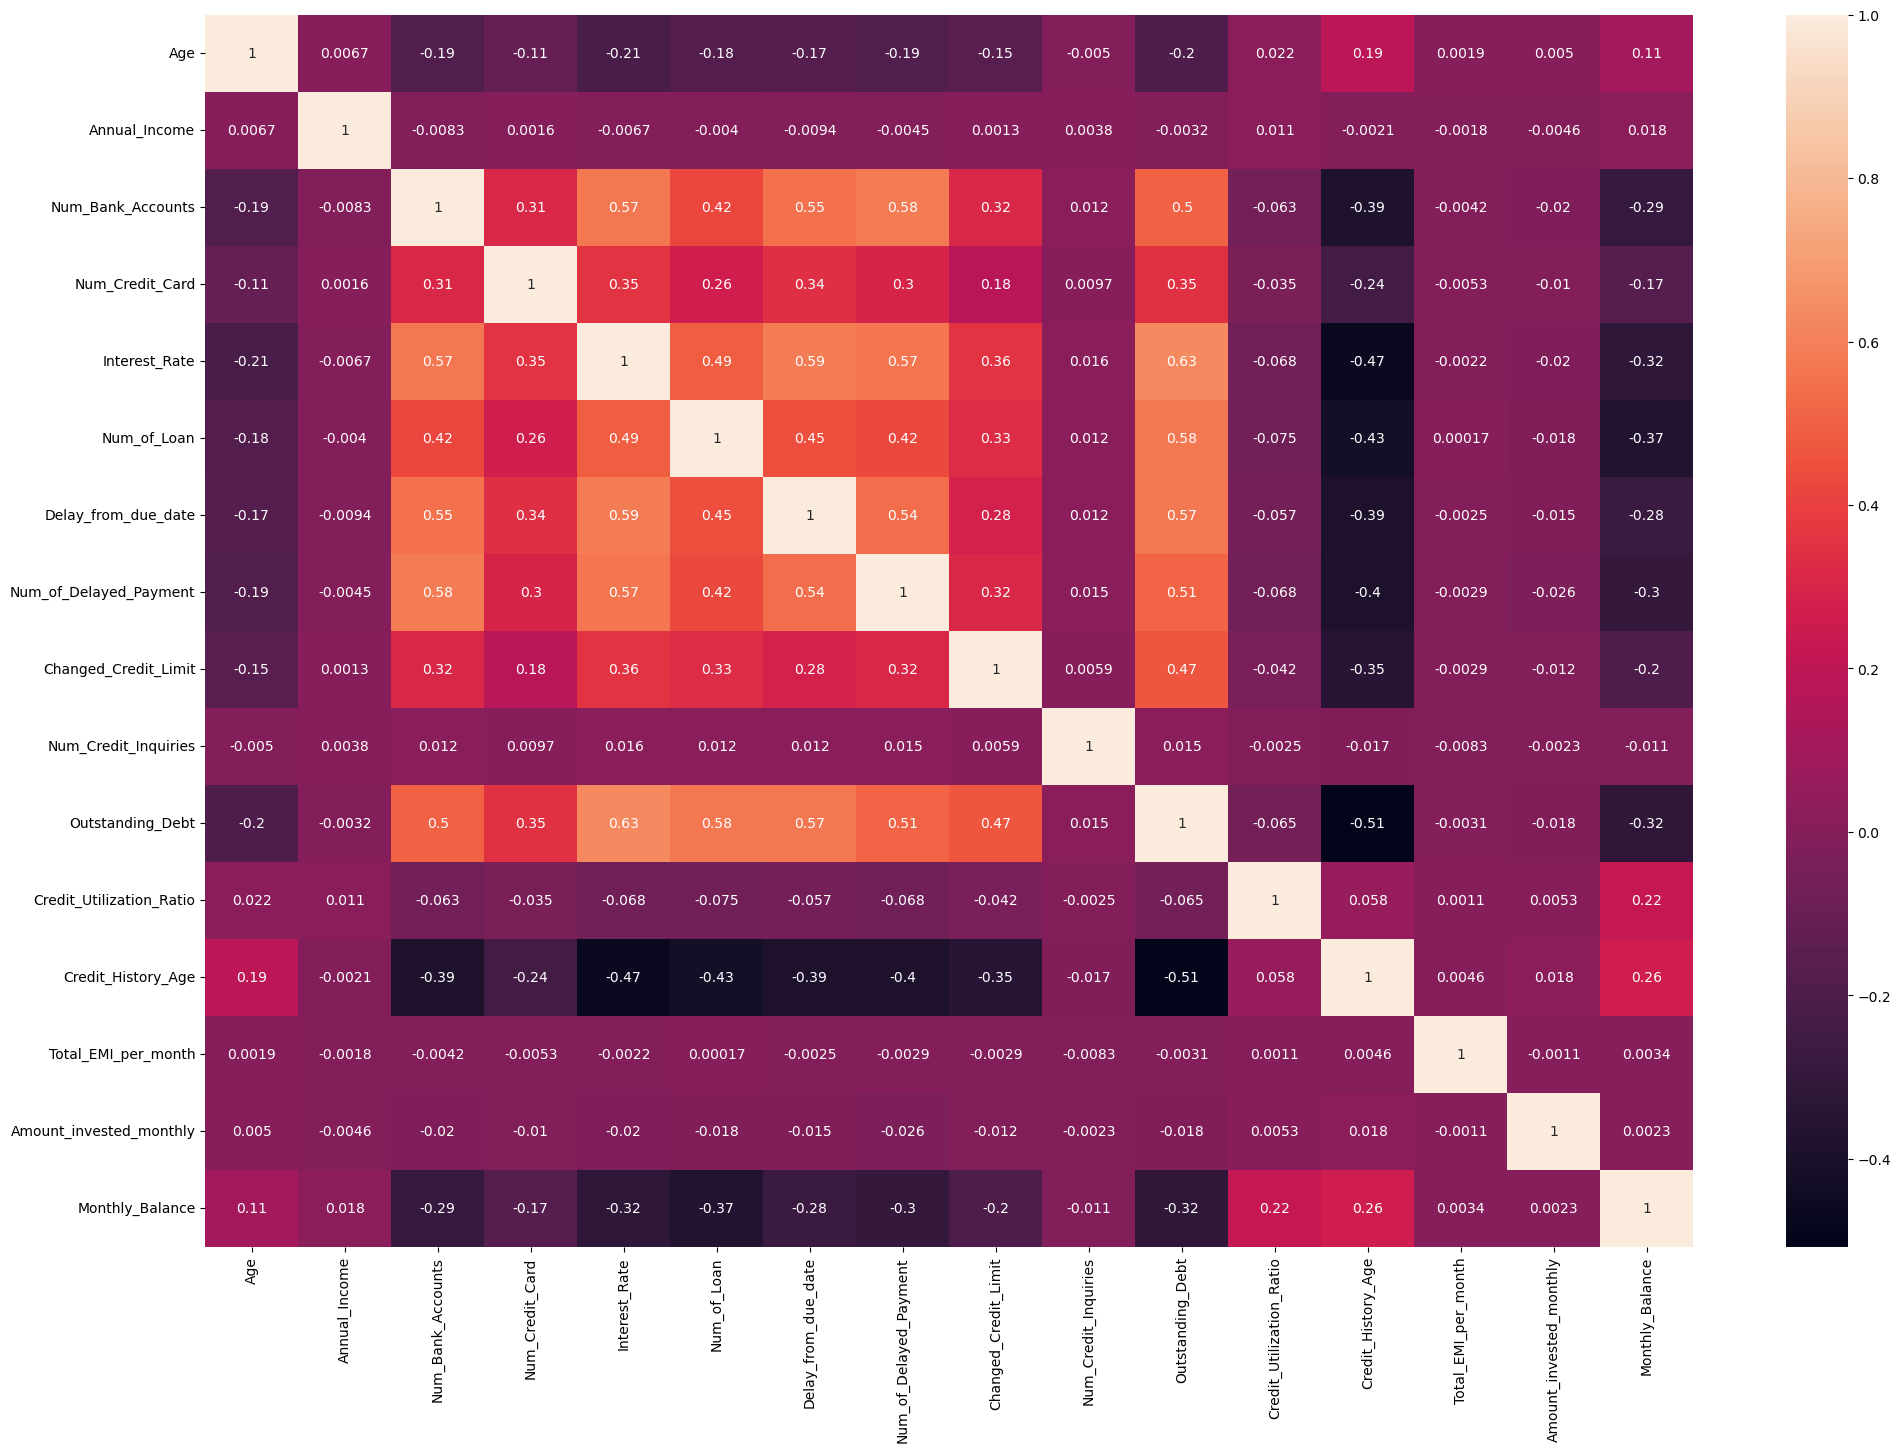

In [ ]:
#correlation matrix
corr_df = df[numerical_cols]
corr_matrix = corr_df.corr()
display(corr_matrix)
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
#drop Monthly_Inhand_Salary since high correlation w/ annual income
df = df.drop(columns=['Monthly_Inhand_Salary'])

# Encode Categorical Attributes

In [ ]:
categorical_cols

['Month',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_Behaviour',
 'Payment_of_Min_Amount']

In [ ]:
# #encode ordered categorical variables
# #ordinal encoding month
d = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}
df["Month"] = df["Month"].map(d)



# ordinal encoding Payment_of_Min_Amount
d_payment={'Yes':1,'No':0,'NM':2}
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].map(d_payment)


# Onehot encoding 'Payment_Behaviour'
df_encoded = pd.get_dummies(df,columns=['Payment_Behaviour'])

# target encoding applied to'Occupation' after data is split into X and y

df_encoded.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,CUS_0xd40,1,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,7,11.27,4,Good,809.98,26.822620,265,0,49.574949,80.415295,312.494089,Good,False,False,True,False,False,False
1,CUS_0xd40,2,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4.428571,6,11.27,4,Good,809.98,31.944960,0,0,49.574949,118.280222,284.629162,Good,False,False,False,True,False,False
2,CUS_0xd40,3,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,7,10.27,4,Good,809.98,28.609352,267,0,49.574949,81.699521,331.209863,Good,False,False,False,False,True,False
3,CUS_0xd40,4,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.000000,4,6.27,4,Good,809.98,31.377862,268,0,49.574949,199.458074,223.451310,Good,False,False,False,False,False,True
4,CUS_0xd40,5,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.000000,6,11.27,4,Good,809.98,24.797347,269,0,49.574949,41.420153,341.489231,Good,False,True,False,False,False,False


In [ ]:
# Parse Type_of_Loan into many attributes and one hot encoding each
df_encoded['Type_of_Loan']=df_encoded['Type_of_Loan'].str.replace(', and ', ', ')
df_loans=df_encoded['Type_of_Loan'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('Type_of_Loan')
df_loans_encoded=pd.get_dummies(df_loans,prefix='loan_',prefix_sep='')
df_loans_encoded=df_loans_encoded.groupby(df_loans_encoded.index).sum()
df_final=df_encoded.drop('Type_of_Loan', axis=1).join(df_loans_encoded)

# ordinal encoding 'Credit Score'
d_cs = {"Good": 2, "Standard": 1, "Poor": 0}
df_final["Credit_Score"] = df_final["Credit_Score"].map(d_cs)

# ordinal encoding 'Credit Mix'
d_cs = {"Good": 2, "Standard": 1, "Bad": 0}
df_final["Credit_Mix"] = df_final["Credit_Mix"].map(d_cs)

df_final

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,loan_Auto Loan,loan_Credit-Builder Loan,loan_Debt Consolidation Loan,loan_Home Equity Loan,loan_Mortgage Loan,loan_Not Specified,loan_Payday Loan,loan_Personal Loan,loan_Student Loan
0,CUS_0xd40,1,23,Scientist,19114.12,3,4,3,4,3.000000,7,11.27,4,2,809.98,26.822620,265,0,49.574949,80.415295,312.494089,2,False,False,True,False,False,False,1,1,0,1,0,0,0,1,0
1,CUS_0xd40,2,23,Scientist,19114.12,3,4,3,4,4.428571,6,11.27,4,2,809.98,31.944960,0,0,49.574949,118.280222,284.629162,2,False,False,False,True,False,False,1,1,0,1,0,0,0,1,0
2,CUS_0xd40,3,23,Scientist,19114.12,3,4,3,4,3.000000,7,10.27,4,2,809.98,28.609352,267,0,49.574949,81.699521,331.209863,2,False,False,False,False,True,False,1,1,0,1,0,0,0,1,0
3,CUS_0xd40,4,23,Scientist,19114.12,3,4,3,4,5.000000,4,6.27,4,2,809.98,31.377862,268,0,49.574949,199.458074,223.451310,2,False,False,False,False,False,True,1,1,0,1,0,0,0,1,0
4,CUS_0xd40,5,23,Scientist,19114.12,3,4,3,4,6.000000,6,11.27,4,2,809.98,24.797347,269,0,49.574949,41.420153,341.489231,2,False,True,False,False,False,False,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,3,25,Mechanic,39628.99,4,6,7,2,20.000000,6,9.50,3,2,502.38,39.323569,377,0,35.104023,140.581403,410.256158,0,False,True,False,False,False,False,1,0,0,0,0,0,0,0,1
99995,CUS_0x942c,4,25,Mechanic,39628.99,4,6,7,2,23.000000,7,11.50,3,2,502.38,34.663572,378,0,35.104023,60.971333,479.866228,0,True,False,False,False,False,False,1,0,0,0,0,0,0,0,1
99996,CUS_0x942c,5,25,Mechanic,39628.99,4,6,7,2,18.000000,7,11.50,3,2,502.38,40.565631,379,0,35.104023,54.185950,496.651610,0,False,True,False,False,False,False,1,0,0,0,0,0,0,0,1
99998,CUS_0x942c,7,25,Mechanic,39628.99,4,6,7,2,20.000000,6,11.50,3,2,502.38,33.638208,381,0,35.104023,251.672582,319.164979,1,False,False,False,True,False,False,1,0,0,0,0,0,0,0,1


In [ ]:
df_final.drop('Customer_ID',axis=1,inplace=True)

# Scaling

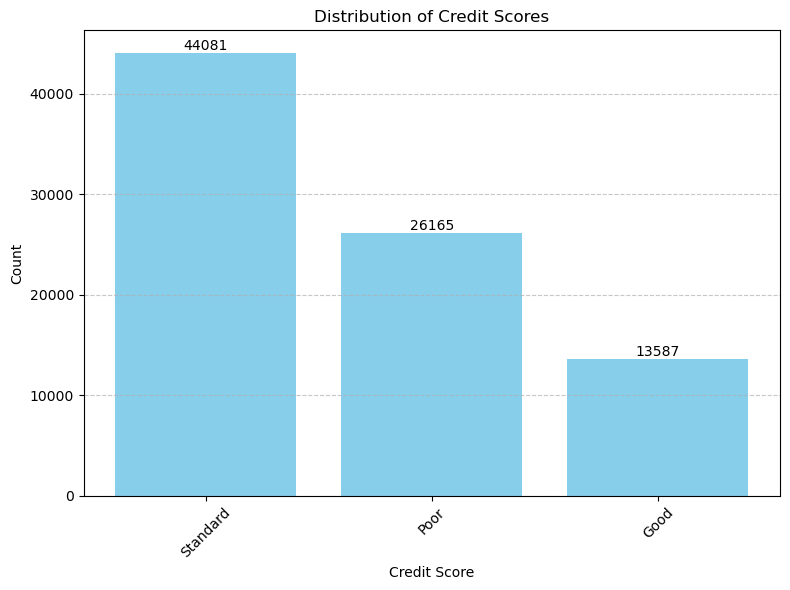

In [ ]:
#target class distribution
data = df['Credit_Score'].value_counts().reset_index()
data.columns = ['Credit_Score', 'Count']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(data['Credit_Score'], data['Count'], color='skyblue')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
for i in range(len(data['Count'])):
    plt.text(i, data['Count'][i], str(data['Count'][i]), ha='center', va='bottom')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only the numerical columns for scaling
numerical_cols_to_scale = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
                           'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                           'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                           'Num_Credit_Inquiries', 'Outstanding_Debt',
                           'Credit_Utilization_Ratio', 'Credit_History_Age',
                           'Total_EMI_per_month', 'Amount_invested_monthly',
                           'Monthly_Balance']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_final[numerical_cols_to_scale] = scaler.fit_transform(df_final[numerical_cols_to_scale])

# Now, df_final contains the scaled numerical features


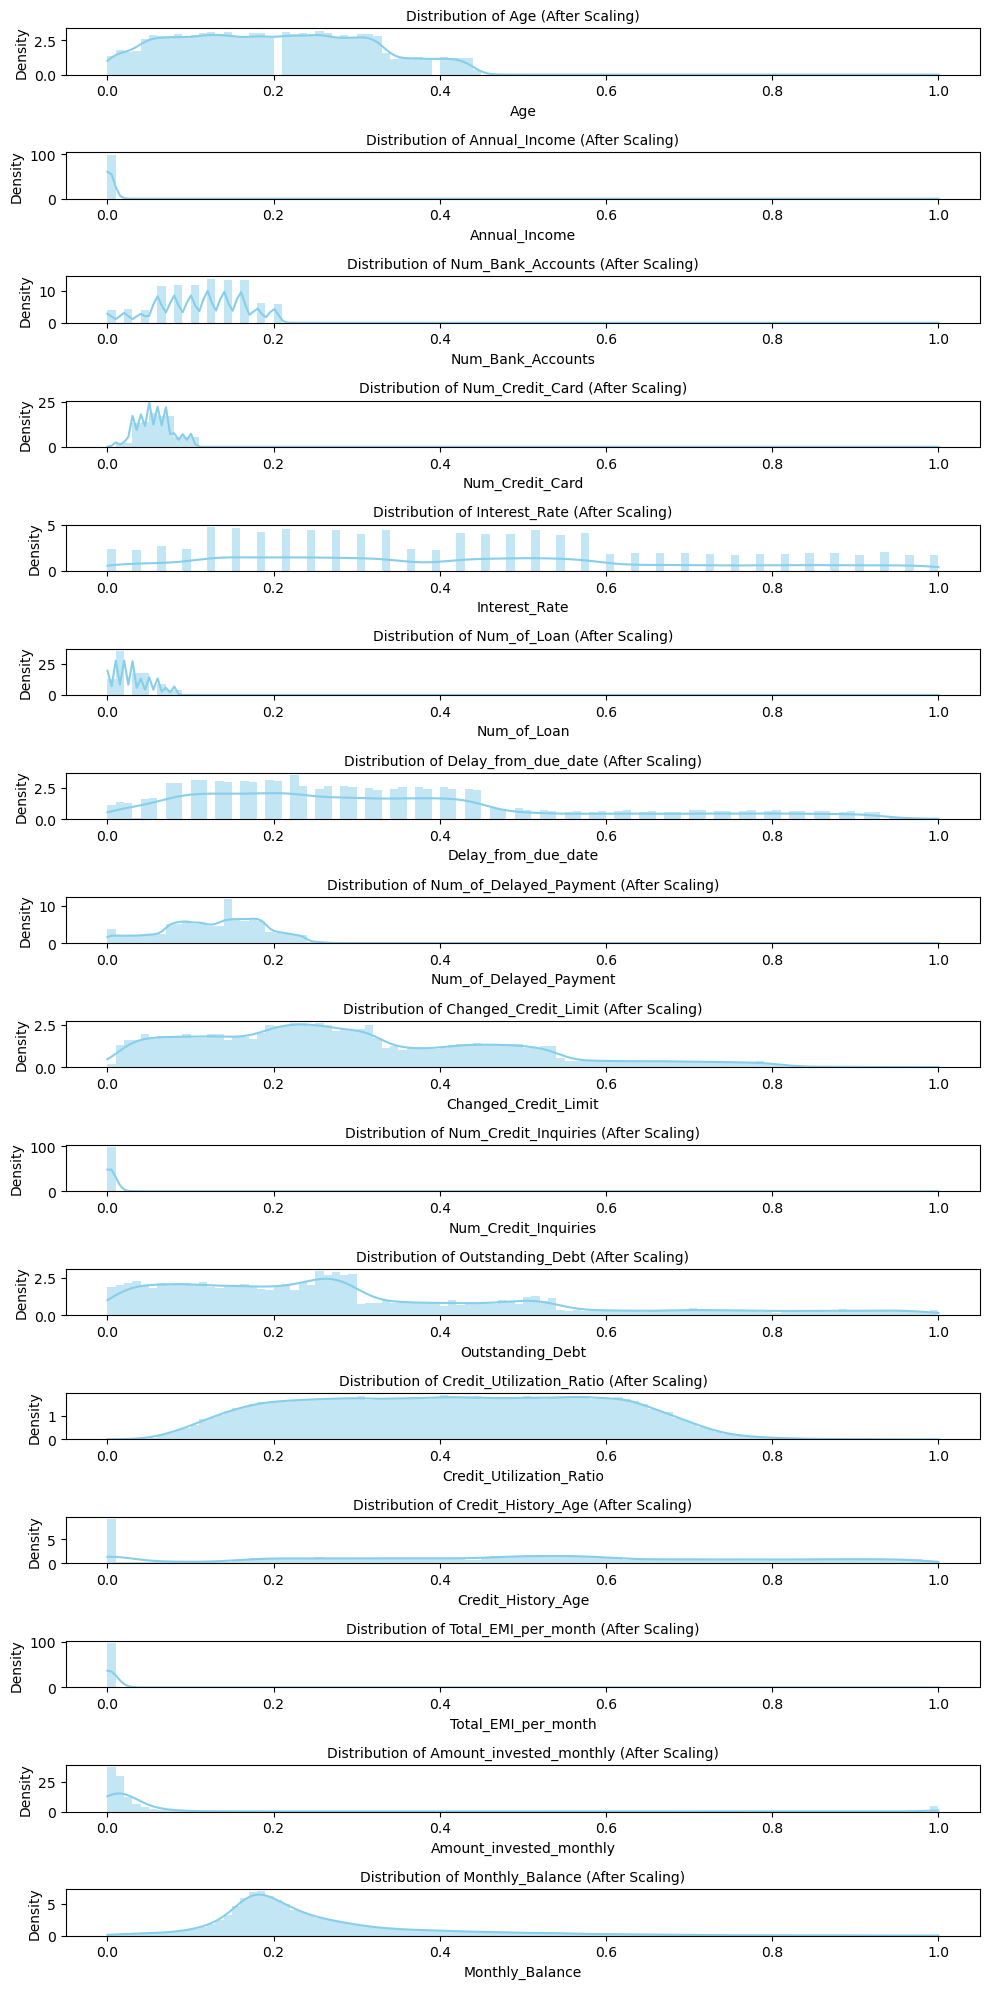

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final and numerical_cols_to_scale are defined

# Create subplots
fig, axes = plt.subplots(len(numerical_cols_to_scale), 1, figsize=(10, 20))

# Plot each scaled numerical feature
for i, col in enumerate(numerical_cols_to_scale):
    sns.histplot(df_final[col], kde=True, stat="density", bins=100, ax=axes[i], color="skyblue", linewidth=0)
    axes[i].set_title(f'Distribution of {col} (After Scaling)', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


## Train-test split - stratified

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score


# Example: Load dataset
# df = pd.read_csv('path_to_your_data.csv')
X = df_final.drop('Credit_Score', axis=1)  # Features
y = df_final['Credit_Score']                # Labels


#target encoding applied to 'Occupation'
target_enc = ce.TargetEncoder(cols=['Occupation'])
X = target_enc.fit_transform(X, y)

# Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Model Building - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(max_depth = None, criterion='entropy',random_state = 0)
model_entropy.fit(X_train, y_train)
y_pred_entropy=model_entropy.predict(X_test)

model_gini = DecisionTreeClassifier(max_depth = None, criterion='gini',random_state = 0)
model_gini.fit(X_train, y_train)
y_pred_gini=model_gini.predict(X_test)

print('Classification report-Entropy')
print(classification_report(y_test, y_pred_entropy))
print('')
print('Classification report-Gini')
print(classification_report(y_test, y_pred_gini))

Classification report-Entropy
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1962
           1       0.76      0.76      0.76      3252
           2       0.72      0.70      0.71      1014

    accuracy                           0.74      6228
   macro avg       0.74      0.73      0.73      6228
weighted avg       0.74      0.74      0.74      6228


Classification report-Gini
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1962
           1       0.76      0.76      0.76      3252
           2       0.68      0.68      0.68      1014

    accuracy                           0.74      6228
   macro avg       0.73      0.73      0.73      6228
weighted avg       0.74      0.74      0.74      6228



The choice between Gini impurity and entropy often doesn't make a significant difference in the performance of the decision tree. However, after testing out both options (using Entropy and Gini as a criterion), we found that in this case the Gini criterion has a slightly higher F-1 score (this is the score that is the best indicator of performance because we are dealing with an unbalanced dataset). It has also higher accuracy, precision and recall. Because of this reason combined with the fact that Gini is a bit more computationally efficient compared to entropy, we will be proceeding with a model that has Gini as the criterion for splitting.

### Basic Decision Tree

In [ ]:
## YOUR CODE HERE

model = DecisionTreeClassifier(max_depth = None, criterion='gini',random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# For the training dataset
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
train_f1Score = f1_score(y_train, train_pred, average='weighted')  # Using 'weighted' average
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')

print('\033[1m' + 'Train\n' + '\033[0m')
print('Accuracy : ', train_acc)
print('Precision: ', train_precision)
print('Recall   : ', train_recall)
print('F1 Score : ', train_f1Score)

# For the testing dataset
test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('')
print('\033[1m' + 'Test\n' + '\033[0m')
print('Accuracy : ', test_acc)
print('Precision: ', test_precision)
print('Recall   : ', test_recall)
print('F1 Score : ', test_f1Score)
print('')
print("\033[1mClassification Report for test data:\033[0m\n", classification_report(y_test, test_pred))


Train

Accuracy :  1.0
Precision:  1.0
Recall   :  1.0
F1 Score :  1.0

Test

Accuracy :  0.7430956968529223
Precision:  0.743069502904972
Recall   :  0.7430956968529223
F1 Score :  0.7430821039344971

Classification Report for test data:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1962
           1       0.76      0.76      0.76      3252
           2       0.68      0.68      0.68      1014

    accuracy                           0.74      6228
   macro avg       0.73      0.73      0.73      6228
weighted avg       0.74      0.74      0.74      6228



In [ ]:
importances = model.feature_importances_
# Constructing a DataFrame to showcase the importance of each feature
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances}).sort_values('Importance', ascending=False)

In [ ]:
# all importances
importances_df

,Feature,Importance
13,Outstanding_Debt,0.178014
12,Credit_Mix,0.113528
6,Interest_Rate,0.066919
15,Credit_History_Age,0.051186
10,Changed_Credit_Limit,0.050343
14,Credit_Utilization_Ratio,0.045448
19,Monthly_Balance,0.043118
0,Month,0.040538
8,Delay_from_due_date,0.038784
1,Age,0.038205


In [ ]:
# Selecting the top 3 features based on their importance
top_3_important_features = importances_df.iloc[:3]
top_3_important_features

,Feature,Importance
13,Outstanding_Debt,0.178014
12,Credit_Mix,0.113528
6,Interest_Rate,0.066919


We can see that Outstanding_Debt, Credit_Mix and Interest_Rate are the top 3 important features when predicting Credit Score.

### Decision Tree using Grid Search and accuracy as scoring metric (turned out to be the best decision tree model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=0)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 30, 50],
    'min_samples_split': [2, 10, 30, 50],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test, test_pred))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score: 0.74
Test Accuracy :  0.7482337829158638
Test Precision:  0.7483042606558956
Test Recall   :  0.7482337829158638
Test F1 Score :  0.7473975435392108
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      1962
           1       0.77      0.76      0.77      3252
           2       0.72      0.63      0.67      1014

    accuracy                           0.75      6228
   macro avg       0.74      0.73      0.73      6228
weighted avg       0.75      0.75      0.75      6228



The best model using stratified split is and accuracy as scoring metric:
    Best parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 30}


In [ ]:
importances_best_model = best_model.feature_importances_
# Constructing a DataFrame to showcase the importance of each feature
importances_df_best_model = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_best_model}).sort_values('Importance', ascending=False)

In [ ]:
# Selecting the top 3 features based on their importance
top_3_important_features_best_model = importances_df_best_model.iloc[:3]
top_3_important_features_best_model

,Feature,Importance
13,Outstanding_Debt,0.195457
12,Credit_Mix,0.125084
6,Interest_Rate,0.071108


In [ ]:
# top 3 important features did not change

### Decision Tree using Grid Search and f1 as scoring metric

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=0)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 30, 50],
    'min_samples_split': [2, 10, 30, 50],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test, test_pred))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: nan
Test Accuracy :  0.7430956968529223
Test Precision:  0.743069502904972
Test Recall   :  0.7430956968529223
Test F1 Score :  0.7430821039344971
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1962
           1       0.76      0.76      0.76      3252
           2       0.68      0.68      0.68      1014

    accuracy                           0.74      6228
   macro avg       0.73      0.73      0.73      6228
weighted avg       0.74      0.74      0.74      6228



## Train-test split - not stratified

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score


# Example: Load dataset
# df = pd.read_csv('path_to_your_data.csv')
X_not = df_final.drop('Credit_Score', axis=1)  # Features
y_not = df_final['Credit_Score']                # Labels


#target encoding applied to 'Occupation'
target_enc = ce.TargetEncoder(cols=['Occupation'])
X_not = target_enc.fit_transform(X, y)

# Split the dataset
X_train_not, X_test_not, y_train_not, y_test_not = train_test_split(X, y, test_size=0.2, random_state=0)

### Decision Tree using Grid Search and not stratified train-test split and accuracy as a scoring metric

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=0)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 30, 50],
    'min_samples_split': [2, 10, 30, 50],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_not, y_train_not)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred_not = best_model.predict(X_test_not)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test_not, test_pred_not)
test_f1Score = f1_score(y_test_not, test_pred_not, average='weighted')
test_precision = precision_score(y_test_not, test_pred_not, average='weighted')
test_recall = recall_score(y_test_not, test_pred_not, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test_not, test_pred_not))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.73
Test Accuracy :  0.7326589595375722
Test Precision:  0.742292053007366
Test Recall   :  0.7326589595375722
Test F1 Score :  0.7350586176393329
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74      1918
           1       0.80      0.73      0.76      3297
           2       0.58      0.74      0.65      1013

    accuracy                           0.73      6228
   macro avg       0.70      0.74      0.72      6228
weighted avg       0.74      0.73      0.74      6228



### Decision Tree using Grid Search and not stratified train-test split and F1 as a scoring metric

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=0)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 30, 50],
    'min_samples_split': [2, 10, 30, 50],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train_not, y_train_not)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred_not = best_model.predict(X_test_not)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test_not, test_pred_not)
test_f1Score = f1_score(y_test_not, test_pred_not, average='weighted')
test_precision = precision_score(y_test_not, test_pred_not, average='weighted')
test_recall = recall_score(y_test_not, test_pred_not, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test_not, test_pred_not))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: nan
Test Accuracy :  0.7265461919246138
Test Precision:  0.7262626207981263
Test Recall   :  0.7265461919246138
Test F1 Score :  0.7263723184192259
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72      5189
           1       0.75      0.76      0.76      8871
           2       0.65      0.64      0.65      2707

    accuracy                           0.73     16767
   macro avg       0.71      0.71      0.71     16767
weighted avg       0.73      0.73      0.73     16767



## Best model - Decision Tree using Grid Search and stratified train-test split and accuracy as a scoring metric: 74.83%

# Model Building - Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC, SVC

svc = LinearSVC(random_state=0)

svc.fit(X_train, y_train.ravel())
y_pred = svc.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.52      0.59      5233
           1       0.67      0.73      0.70      8816
           2       0.50      0.54      0.52      2718

    accuracy                           0.64     16767
   macro avg       0.61      0.60      0.60     16767
weighted avg       0.64      0.64      0.63     16767

Accuracy Score: 0.6358322896165086


# SVM using Grid Search and accuracy as scoring metric

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the SVM classifier
model = LinearSVC(random_state=0)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test, test_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'C': 1}
Best cross-validation score: 0.64
Test Accuracy :  0.6358322896165086
Test Precision:  0.6380796945418927
Test Recall   :  0.6358322896165086
Test F1 Score :  0.6333590730223491
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.67      0.52      0.59      5233
           1       0.67      0.73      0.70      8816
           2       0.50      0.54      0.52      2718

    accuracy                           0.64     16767
   macro avg       0.61      0.60      0.60     16767
weighted avg       0.64      0.64      0.63     16767



# SVM using Grid Search and F1 as scoring metric

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the SVM classifier
model = LinearSVC(random_state=0)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test, test_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'C': 0.1}
Best cross-validation score: nan
Test Accuracy :  0.6344605475040258
Test Precision:  0.6369172190106528
Test Recall   :  0.6344605475040258
Test F1 Score :  0.632074443722058
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.67      0.52      0.59      5233
           1       0.66      0.73      0.70      8816
           2       0.49      0.54      0.51      2718

    accuracy                           0.63     16767
   macro avg       0.61      0.60      0.60     16767
weighted avg       0.64      0.63      0.63     16767



# SVM using Grid Search and not stratified train-test split and accuracy as a scoring metric

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree classifier
model = LinearSVC(random_state=0)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_not, y_train_not)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred_not = best_model.predict(X_test_not)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test_not, test_pred_not)
test_f1Score = f1_score(y_test_not, test_pred_not, average='weighted')
test_precision = precision_score(y_test_not, test_pred_not, average='weighted')
test_recall = recall_score(y_test_not, test_pred_not, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test_not, test_pred_not))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'C': 1}
Best cross-validation score: 0.63
Test Accuracy :  0.6437645374843443
Test Precision:  0.6448290051074147
Test Recall   :  0.6437645374843443
Test F1 Score :  0.641010556910082
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.67      0.53      0.59      5189
           1       0.67      0.74      0.71      8871
           2       0.51      0.54      0.52      2707

    accuracy                           0.64     16767
   macro avg       0.62      0.60      0.61     16767
weighted avg       0.64      0.64      0.64     16767



# SVM using Grid Search and not stratified train-test split and F1 as a scoring metric

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree classifier
model = LinearSVC(random_state=0)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train_not, y_train_not)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred_not = best_model.predict(X_test_not)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test_not, test_pred_not)
test_f1Score = f1_score(y_test_not, test_pred_not, average='weighted')
test_precision = precision_score(y_test_not, test_pred_not, average='weighted')
test_recall = recall_score(y_test_not, test_pred_not, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test_not, test_pred_not))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'C': 0.1}
Best cross-validation score: nan
Test Accuracy :  0.6420945905647999
Test Precision:  0.6433498266806814
Test Recall   :  0.6420945905647999
Test F1 Score :  0.6393385166374469
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.67      0.53      0.59      5189
           1       0.67      0.74      0.71      8871
           2       0.50      0.53      0.52      2707

    accuracy                           0.64     16767
   macro avg       0.61      0.60      0.60     16767
weighted avg       0.64      0.64      0.64     16767



Best Model: SVM (C=1) not stratified and accuracy as a scoring metric, F1 Score :  0.641010556910082

# Basic XGBoost Classifier

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=0)

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      5233
           1       0.80      0.78      0.79      8816
           2       0.69      0.75      0.72      2718

    accuracy                           0.77     16767
   macro avg       0.76      0.77      0.76     16767
weighted avg       0.78      0.77      0.77     16767

Accuracy Score: 0.7744378839386891


In [ ]:
importances = model.feature_importances_
# Constructing a DataFrame to showcase the importance of each feature
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances}).sort_values('Importance', ascending=False)
display(importances_df)
top_3_important_features = importances_df.iloc[:3]
top_3_important_features

,Feature,Importance
12,Credit_Mix,0.571598
13,Outstanding_Debt,0.066273
6,Interest_Rate,0.037211
0,Month,0.026059
5,Num_Credit_Card,0.023430
10,Changed_Credit_Limit,0.016363
8,Delay_from_due_date,0.015507
25,Payment_Behaviour_Low_spent_Small_value_payments,0.014300
4,Num_Bank_Accounts,0.014076
17,Total_EMI_per_month,0.011483


,Feature,Importance
12,Credit_Mix,0.571598
13,Outstanding_Debt,0.066273
6,Interest_Rate,0.037211


# XGBoost using Grid Search and accuracy as scoring metric

In [ ]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier(random_state=0)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # learning rate
    'max_depth': [3, 4, 5],  # maximum depth of a tree
    'n_estimators': [100, 200, 300],  # number of boosting rounds
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test, test_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best cross-validation score: 0.75
Test Accuracy :  0.7484940657243395
Test Precision:  0.7506487827515935
Test Recall   :  0.7484940657243395
Test F1 Score :  0.7492062125908383
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      5233
           1       0.78      0.77      0.77      8816
           2       0.64      0.71      0.68      2718

    accuracy                           0.75     16767
   macro avg       0.73      0.74      0.73     16767
weighted avg       0.75      0.75      0.75     16767



# XGBoost using Grid Search and f1 as scoring metric

In [ ]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier(random_state=0)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # learning rate
    'max_depth': [3, 4, 5],  # maximum depth of a tree
    'n_estimators': [100, 200, 300],  # number of boosting rounds
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test, test_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score: nan
Test Accuracy :  0.7130673346454345
Test Precision:  0.7192713845932031
Test Recall   :  0.7130673346454345
Test F1 Score :  0.7146255950654565
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      5233
           1       0.75      0.74      0.74      8816
           2       0.57      0.71      0.63      2718

    accuracy                           0.71     16767
   macro avg       0.69      0.71      0.69     16767
weighted avg       0.72      0.71      0.71     16767



# XGBoost using Grid Search and not stratified train-test split and accuracy as a scoring metric

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree classifier
model = xgb.XGBClassifier(random_state=0)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # learning rate
    'max_depth': [3, 4, 5],  # maximum depth of a tree
    'n_estimators': [100, 200, 300],  # number of boosting rounds
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_not, y_train_not)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred_not = best_model.predict(X_test_not)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test_not, test_pred_not)
test_f1Score = f1_score(y_test_not, test_pred_not, average='weighted')
test_precision = precision_score(y_test_not, test_pred_not, average='weighted')
test_recall = recall_score(y_test_not, test_pred_not, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test_not, test_pred_not))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best cross-validation score: 0.75
Test Accuracy :  0.7570823641677104
Test Precision:  0.7586211842683794
Test Recall   :  0.7570823641677104
Test F1 Score :  0.7576296176715407
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      5189
           1       0.79      0.78      0.78      8871
           2       0.66      0.72      0.69      2707

    accuracy                           0.76     16767
   macro avg       0.74      0.75      0.74     16767
weighted avg       0.76      0.76      0.76     16767



# XGBoost using Grid Search and not stratified train-test split and f1 as a scoring metric

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree classifier
model = xgb.XGBClassifier(random_state=0)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # learning rate
    'max_depth': [3, 4, 5],  # maximum depth of a tree
    'n_estimators': [100, 200, 300],  # number of boosting rounds
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train_not, y_train_not)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred_not = best_model.predict(X_test_not)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test_not, test_pred_not)
test_f1Score = f1_score(y_test_not, test_pred_not, average='weighted')
test_precision = precision_score(y_test_not, test_pred_not, average='weighted')
test_recall = recall_score(y_test_not, test_pred_not, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test_not, test_pred_not))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score: nan
Test Accuracy :  0.7199260452078488
Test Precision:  0.7257128425343948
Test Recall   :  0.7199260452078488
Test F1 Score :  0.7213323901216393
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      5189
           1       0.76      0.75      0.75      8871
           2       0.58      0.71      0.64      2707

    accuracy                           0.72     16767
   macro avg       0.69      0.71      0.70     16767
weighted avg       0.73      0.72      0.72     16767



Best Model: Non-*stratified* XGBoost (learning_rate=0.1, max_depth=3, n_estimators=100) , F1 Score: 0.77

# Random Forest

## Basic Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=13)

# Train the model
random_forest.fit(X_train, y_train)

# Model information
print("Random Forest Model Information:")
print(f"Number of estimators: {random_forest.n_estimators}")
print(f"Criterion: {random_forest.criterion}")
print(f"Maximum depth of the trees: {random_forest.max_depth}")
print(f"Minimum samples split: {random_forest.min_samples_split}")
print(f"Minimum samples leaf: {random_forest.min_samples_leaf}")

Random Forest Model Information:
Number of estimators: 100
Criterion: gini
Maximum depth of the trees: None
Minimum samples split: 2
Minimum samples leaf: 1


In [ ]:

# For the training dataset
train_pred = random_forest.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
train_f1Score = f1_score(y_train, train_pred, average='weighted')  # Using 'weighted' average
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')

print('\033[1m' + 'Train\n' + '\033[0m')
print('Accuracy : ', train_acc)
print('Precision: ', train_precision)
print('Recall   : ', train_recall)
print('F1 Score : ', train_f1Score)

# For the testing dataset
test_pred = random_forest.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('')
print('\033[1m' + 'Test\n' + '\033[0m')
print('Accuracy : ', test_acc)
print('Precision: ', test_precision)
print('Recall   : ', test_recall)
print('F1 Score : ', test_f1Score)
print('')
print("\033[1mClassification Report for test data:\033[0m\n", classification_report(y_test, test_pred))


Train

Accuracy :  1.0
Precision:  1.0
Recall   :  1.0
F1 Score :  1.0

Test

Accuracy :  0.819203596660244
Precision:  0.8198849187492654
Recall   :  0.819203596660244
F1 Score :  0.8189816005903009

Classification Report for test data:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1962
           1       0.84      0.81      0.83      3252
           2       0.79      0.76      0.77      1014

    accuracy                           0.82      6228
   macro avg       0.81      0.81      0.81      6228
weighted avg       0.82      0.82      0.82      6228



In [ ]:
importances = random_forest.feature_importances_
# Constructing a DataFrame to showcase the importance of each feature
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances}).sort_values('Importance', ascending=False)
importances_df

,Feature,Importance
13,Outstanding_Debt,0.102284
6,Interest_Rate,0.073268
12,Credit_Mix,0.071119
10,Changed_Credit_Limit,0.053104
15,Credit_History_Age,0.052772
8,Delay_from_due_date,0.050381
19,Monthly_Balance,0.042719
11,Num_Credit_Inquiries,0.040332
5,Num_Credit_Card,0.040069
18,Amount_invested_monthly,0.039673


In [ ]:
# Selecting the top 3 features based on their importance
top_3_important_features = importances_df.iloc[:3]
top_3_important_features

,Feature,Importance
13,Outstanding_Debt,0.102284
6,Interest_Rate,0.073268
12,Credit_Mix,0.071119


## Random Forest using Grid Search and accuracy as scoring metric

In [ ]:

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 30, 50],
    'min_samples_split': [2, 10, 30, 50],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test, test_pred))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.81
Test Accuracy :  0.817856503846842
Test Precision:  0.8189936172263916
Test Recall   :  0.817856503846842
Test F1 Score :  0.8178631466042983
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      5233
           1       0.85      0.81      0.83      8816
           2       0.77      0.78      0.77      2718

    accuracy                           0.82     16767
   macro avg       0.81      0.81      0.81     16767
weighted avg       0.82      0.82      0.82     16767



## Random Forest using Grid Search and f1 score as scoring metric

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 30, 50],
    'min_samples_split': [2, 10, 30, 50],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test, test_pred)
test_f1Score = f1_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test, test_pred))


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: nan
Test Accuracy :  0.819203596660244
Test Precision:  0.8198849187492654
Test Recall   :  0.819203596660244
Test F1 Score :  0.8189816005903009
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1962
           1       0.84      0.81      0.83      3252
           2       0.79      0.76      0.77      1014

    accuracy                           0.82      6228
   macro avg       0.81      0.81      0.81      6228
weighted avg       0.82      0.82      0.82      6228



## Random Forest using Grid Search and not stratified train-test split and accuracy as a scoring metric

In [ ]:
#  Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 30, 50],
    'min_samples_split': [2, 10, 30, 50],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_not, y_train_not)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred_not = best_model.predict(X_test_not)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test_not, test_pred_not)
test_f1Score = f1_score(y_test_not, test_pred_not, average='weighted')
test_precision = precision_score(y_test_not, test_pred_not, average='weighted')
test_recall = recall_score(y_test_not, test_pred_not, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test_not, test_pred_not))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.81
Test Accuracy :  0.8264290301862556
Test Precision:  0.827831832163451
Test Recall   :  0.8264290301862556
Test F1 Score :  0.82636265433962
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1918
           1       0.85      0.81      0.83      3297
           2       0.80      0.78      0.79      1013

    accuracy                           0.83      6228
   macro avg       0.82      0.82      0.82      6228
weighted avg       0.83      0.83      0.83      6228



## Random Forest using Grid Search and not stratified train-test split and F1 as a scoring metric

In [ ]:
#  Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 30, 50],
    'min_samples_split': [2, 10, 30, 50],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=1, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train_not, y_train_not)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
test_pred_not = best_model.predict(X_test_not)

# Evaluate the best model on the test data
test_acc = accuracy_score(y_test_not, test_pred_not)
test_f1Score = f1_score(y_test_not, test_pred_not, average='weighted')
test_precision = precision_score(y_test_not, test_pred_not, average='weighted')
test_recall = recall_score(y_test_not, test_pred_not, average='weighted')

print('Test Accuracy : ', test_acc)
print('Test Precision: ', test_precision)
print('Test Recall   : ', test_recall)
print('Test F1 Score : ', test_f1Score)
print("Classification Report for Test Data:\n", classification_report(y_test_not, test_pred_not))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: nan
Test Accuracy :  0.8249839434810533
Test Precision:  0.8265149048341595
Test Recall   :  0.8249839434810533
Test F1 Score :  0.8249941200304192
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1918
           1       0.85      0.81      0.83      3297
           2       0.80      0.79      0.79      1013

    accuracy                           0.82      6228
   macro avg       0.82      0.82      0.82      6228
weighted avg       0.83      0.82      0.82      6228



# KNN

## Stratified Splitting:

### Basic KNN Model Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df_encoded is your DataFrame containing the encoded features and target variable

# Define X (features) and y (target variable)
X = df_encoded.drop(columns=['Credit_Score'])
y = df_encoded['Credit_Score']

# Encode categorical variables
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        label_encoders[col] = LabelEncoder()
        X[col] = label_encoders[col].fit_transform(X[col])

# Stratified splitting
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Training the classifier on the stratified training data
knn_classifier.fit(X_train_s, y_train_s)

# Predicting the target variable for the stratified test set
y_pred_s = knn_classifier.predict(X_test_s)

# Calculating accuracy
accuracy_s = accuracy_score(y_test_s, y_pred_s)
print("Stratified Splitting Accuracy:", accuracy_s)

# Calculating F1 score
f1_s = f1_score(y_test_s, y_pred_s, average='weighted')
print("Stratified Splitting F1 Score:", f1_s)

# Calculating precision
precision_s = precision_score(y_test_s, y_pred_s, average='weighted')
print("Stratified Splitting Precision:", precision_s)

# Calculating recall
recall_s = recall_score(y_test_s, y_pred_s, average='weighted')
print("Stratified Splitting Recall:", recall_s)


Stratified Splitting Accuracy: 0.7580366195503071
Stratified Splitting F1 Score: 0.7582221602926404
Stratified Splitting Precision: 0.7595573951806157
Stratified Splitting Recall: 0.7580366195503071


### KNN Model Training with Grid Search for Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Experiment with different values of k

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Stratified splitting
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform grid search for hyperparameter tuning
grid_search_s = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search_s.fit(X_train_s, y_train_s)

# Get the best parameters
best_params_s = grid_search_s.best_params_

# Use the best model to predict the target variable for the stratified test set
best_model_s = grid_search_s.best_estimator_
y_pred_s = best_model_s.predict(X_test_s)

# Evaluating the accuracy of the best stratified model
accuracy_s = accuracy_score(y_test_s, y_pred_s)
print("Stratified Splitting Best Parameters:", best_params_s)
print("Stratified Splitting Accuracy:", accuracy_s)

# Calculating F1 score
f1_s = f1_score(y_test_s, y_pred_s, average='weighted')
print("Stratified Splitting F1 Score:", f1_s)

# Calculating precision
precision_s = precision_score(y_test_s, y_pred_s, average='weighted')
print("Stratified Splitting Precision:", precision_s)

# Calculating recall
recall_s = recall_score(y_test_s, y_pred_s, average='weighted')
print("Stratified Splitting Recall:", recall_s)


Stratified Splitting Best Parameters: {'n_neighbors': 3}
Stratified Splitting Accuracy: 0.7600644122383253
Stratified Splitting F1 Score: 0.7605841879175074
Stratified Splitting Precision: 0.7620637730069508
Stratified Splitting Recall: 0.7600644122383253


### KNN Model Training with Different Distance Metric and Weighting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Stratified splitting
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize KNN classifier with custom distance metric and weighting
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')

# Training the classifier on the stratified training data
knn_classifier.fit(X_train_s, y_train_s)

# Predicting the target variable for the stratified test set
y_pred_s = knn_classifier.predict(X_test_s)

# Evaluating the accuracy of the model
accuracy_s = accuracy_score(y_test_s, y_pred_s)
print("Stratified Splitting Accuracy:", accuracy_s)

# Calculating F1 score
f1_s = f1_score(y_test_s, y_pred_s, average='weighted')
print("Stratified Splitting F1 Score:", f1_s)

# Calculating precision
precision_s = precision_score(y_test_s, y_pred_s, average='weighted')
print("Stratified Splitting Precision:", precision_s)

# Calculating recall
recall_s = recall_score(y_test_s, y_pred_s, average='weighted')
print("Stratified Splitting Recall:", recall_s)

Stratified Splitting Accuracy: 0.7741396791316276
Stratified Splitting F1 Score: 0.7741466245683054
Stratified Splitting Precision: 0.7743594187545387
Stratified Splitting Recall: 0.7741396791316276


## Non-Stratified Splitting

### Basic KNN Model Training and Testing

In [ ]:
# Non-stratified splitting
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Training the classifier on the non-stratified training data
knn_classifier.fit(X_train_ns, y_train_ns)

# Predicting the target variable for the non-stratified test set
y_pred_ns = knn_classifier.predict(X_test_ns)

# Evaluating the accuracy of the model
accuracy_ns = accuracy_score(y_test_ns, y_pred_ns)
print("Non-Stratified Splitting Accuracy:", accuracy_ns)

# Calculating F1 score
f1_ns = f1_score(y_test_ns, y_pred_ns, average='weighted')
print("Stratified Splitting F1 Score:", f1_ns)

# Calculating precision
precision_ns = precision_score(y_test_ns, y_pred_ns, average='weighted')
print("Stratified Splitting Precision:", precision_ns)

# Calculating recall
recall_ns = recall_score(y_test_ns, y_pred_ns, average='weighted')
print("Stratified Splitting Recall:", recall_ns)


Non-Stratified Splitting Accuracy: 0.7585733882030178
Stratified Splitting F1 Score: 0.7587511930307513
Stratified Splitting Precision: 0.7601981369634317
Stratified Splitting Recall: 0.7585733882030178


### KNN Model Training with Grid Search for Hyperparameter Tuning

In [ ]:
# Non-stratified splitting
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform grid search for hyperparameter tuning
grid_search_ns = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search_ns.fit(X_train_ns, y_train_ns)

# Get the best parameters
best_params_ns = grid_search_ns.best_params_

# Use the best model to predict the target variable for the non-stratified test set
best_model_ns = grid_search_ns.best_estimator_
y_pred_ns = best_model_ns.predict(X_test_ns)

# Evaluating the accuracy of the best non-stratified model
accuracy_ns = accuracy_score(y_test_ns, y_pred_ns)
print("Non-Stratified Splitting Best Parameters:", best_params_ns)
print("Non-Stratified Splitting Accuracy:", accuracy_ns)

f1_ns = f1_score(y_test_ns, y_pred_ns, average='weighted')
print("Stratified Splitting F1 Score:", f1_ns)

# Calculating precision
precision_ns = precision_score(y_test_ns, y_pred_ns, average='weighted')
print("Stratified Splitting Precision:", precision_ns)

# Calculating recall
recall_ns = recall_score(y_test_ns, y_pred_ns, average='weighted')
print("Stratified Splitting Recall:", recall_ns)


Non-Stratified Splitting Best Parameters: {'n_neighbors': 3}
Non-Stratified Splitting Accuracy: 0.7626289735790541
Stratified Splitting F1 Score: 0.7628621376962333
Stratified Splitting Precision: 0.7639602192212621
Stratified Splitting Recall: 0.7626289735790541


### KNN Model Training with Different Distance Metric and Weighting

In [ ]:
# Non-stratified splitting
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier with custom distance metric and weighting
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')

# Training the classifier on the non-stratified training data
knn_classifier.fit(X_train_ns, y_train_ns)

# Predicting the target variable for the non-stratified test set
y_pred_ns = knn_classifier.predict(X_test_ns)

# Evaluating the accuracy of the model
accuracy_ns = accuracy_score(y_test_ns, y_pred_ns)
print("Non-Stratified Splitting Accuracy:", accuracy_ns)

f1_ns = f1_score(y_test_ns, y_pred_ns, average='weighted')
print("Stratified Splitting F1 Score:", f1_ns)

# Calculating precision
precision_ns = precision_score(y_test_ns, y_pred_ns, average='weighted')
print("Stratified Splitting Precision:", precision_ns)

# Calculating recall
recall_ns = recall_score(y_test_ns, y_pred_ns, average='weighted')
print("Stratified Splitting Recall:", recall_ns)


Non-Stratified Splitting Accuracy: 0.7700840937555914
Stratified Splitting F1 Score: 0.7700025873184043
Stratified Splitting Precision: 0.7704355691661218
Stratified Splitting Recall: 0.7700840937555914


## Best model - KNN Model Training with Different Distance Metric and Weighting and stratified train-test split and accuracy as a scoring metric  = 72.7%

### Neural Network using stratified 5 fold Cross Validation

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam

df_final = pd.get_dummies(df_final, columns=['Occupation'], drop_first=True)

# Converting the DataFrame to numpy arrays
X = df_final.drop('Credit_Score', axis=1).values.astype('float32')
y = df_final['Credit_Score'].values.astype('int32')

# handling NaN values in the dataset
X = np.nan_to_num(X)


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
def create_model(input_shape):
    model = Sequential([
        Dense(256, input_shape=(input_shape,)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(64),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        Dense(32),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        Dense(3, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
scores = []
for train, test in kfold.split(X, y):
    model = create_model(X[train].shape[1])
    history = model.fit(X[train], y[train], epochs=50, validation_split=0.2, verbose=0)
    y_pred = np.argmax(model.predict(X[test]), axis=1)
    y_true = y[test]

    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)

    scores.append((f1, precision, recall, accuracy))

# Displaying average metrics
f1_avg, precision_avg, recall_avg, accuracy_avg = np.mean(scores, axis=0)
print(f'Average F1 Score: {f1_avg}, Average Precision: {precision_avg}, Average Recall: {recall_avg}, Average Accuracy: {accuracy_avg}')


524/524 [==============================] - 1s 2ms/step
Average F1 Score: 0.6876913063550099, Average Precision: 0.6771867286350984, Average Recall: 0.7106514337046946, Average Accuracy: 0.705032558109687
